In [669]:
# matplotlib 한글 출력 가능하도록 만들기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.text as mpl_text

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# image url 읽기위해서
import urllib
from PIL import Image

# 데이터 분석 모듈
import pandas as pd
import numpy as np

import seaborn as sns

on_display = False

In [670]:
# chnage color
import matplotlib as mpl
COLOR = 'gray'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# - KBO의 비만도를 조사하고 비만도가 실제 영향을 주는지 판별한다. -

In [692]:
# set pandas option
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 50)

In [693]:
# Load image from url fuction
def get_player_image_from_url(url, add_resize_val=0):
    # Load Image
    image = Image.open(urllib.request.urlopen(url))

    width, height = image.size
    img = image.resize((width + add_resize_val
                        , height + add_resize_val)
                        , Image.ANTIALIAS)
    return img

In [694]:
# Display Plaer Image Graph Fuction
def display_player_img_graph(sort_df_data, y_lim_min, y_lim_max,
                             ax, pick_column ,top_num=15, add_text_pos_y = 0):
    top_data = sort_df_data.iloc[-top_num:, :]
    top_data.reset_index(inplace=True)

    ax.set_xlim(-1, top_num)
    ax.set_ylim(y_lim_min, y_lim_max)


    for idx, series in top_data.iterrows():
        # 참고사이트 : https://medium.com/@shaw.t/how-to-plot-image-and-text-on-matplotlib-91d7f23a3043

        # Insert Image
        img = get_player_image_from_url("http:" + top_data.loc[idx, "사진URL"]
                                        , add_resize_val=-30)
        ax.add_artist(
            AnnotationBbox(OffsetImage(img) ,(idx, series[pick_column]),frameon=True )
                    )
        # Insert Text
        ax.add_artist(
            mpl_text.Text( idx ,series[pick_column] + add_text_pos_y
                ,text= f"{top_num - idx}위_" + series["선수명"]
                ,color='black'  ,backgroundcolor="white"
                ,horizontalalignment='center' ,fontsize=10)
                    )


In [695]:
# preprocessing
df_players = pd.read_csv("player_attack_for_simon.csv", index_col="선수명")
df_players.drop(df_players.columns[0],axis=1,inplace=True)


In [696]:
df_players["신장"] = df_players["신장"].apply(lambda x: x.rstrip("cm")).astype("float")
df_players["체중"] = df_players["체중"].apply(lambda x: x.rstrip("kg")).astype("float")

In [697]:
# add null Player info
df_players.loc["화이트", "신장"] = 180
df_players.loc["화이트", "체중"] = 102

## 구단별 신장 체중 분포를 살펴본다.

c:\users\simon\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


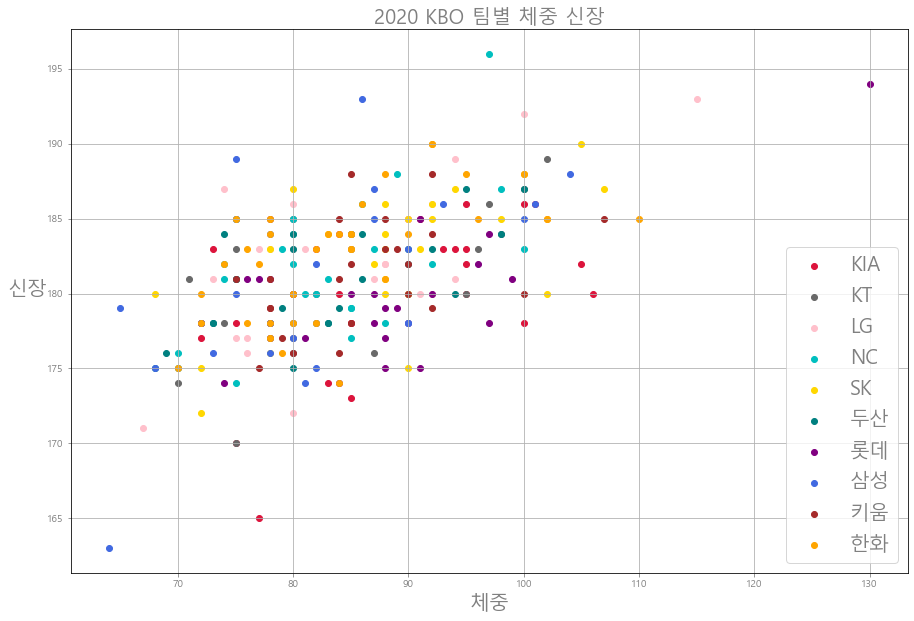

In [698]:
# Display Group by Team's Height with Weight
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

plt.subplot(1, 1, 1)
team_groups = df_players.groupby("팀명")

colors = {'KIA':'crimson', '두산':'teal', '롯데':'purple', '삼성':'royalblue', '키움':'brown',
          '한화':'orange', 'KT':'dimgray', 'LG':'pink', 'NC':'c', 'SK':'gold'}

for name, group in team_groups:
    plt.scatter(group["체중"], group["신장"], label=name, c=colors[name])

# $$ 이거마우스 데면 되도록 해보기
label_fontsize= 20
plt.title("2020 KBO 팀별 체중 신장",fontsize=label_fontsize)
plt.xlabel("체중", fontsize=label_fontsize)
ax.set_ylabel("신장", rotation=0, labelpad=20, fontsize=label_fontsize)
plt.legend(loc=4, prop={'size':20})
plt.grid()
plt.show()

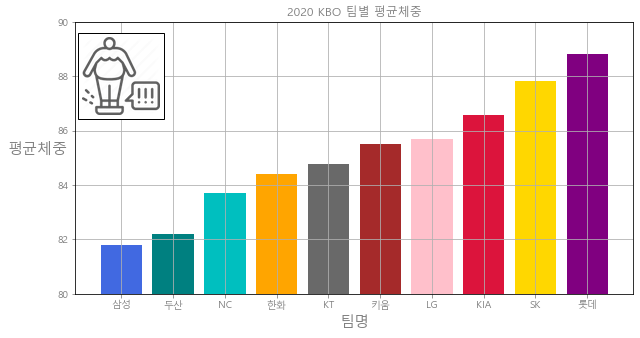

In [678]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Insert Image
fat_url = "https://cdn0.iconfinder.com/data/icons/obesity-and-overweight-line-set/64/obesity-11-128.png"
img_fat = get_player_image_from_url(fat_url , add_resize_val=-50)
ax.add_artist( AnnotationBbox(OffsetImage(img_fat) ,(0, 88),frameon=True ))

sort_mean_kg = team_groups["체중"].mean().sort_values()

bar_colors = [colors[x] for x in sort_mean_kg.index]
plt.bar(sort_mean_kg.index, sort_mean_kg, color=bar_colors)
plt.title("2020 KBO 팀별 평균체중")
plt.ylim(80, 90)
plt.xlabel("팀명", fontsize=15)

ax.set_ylabel("평균체중", rotation=0, labelpad=20, fontsize=15)
plt.grid()
plt.show()

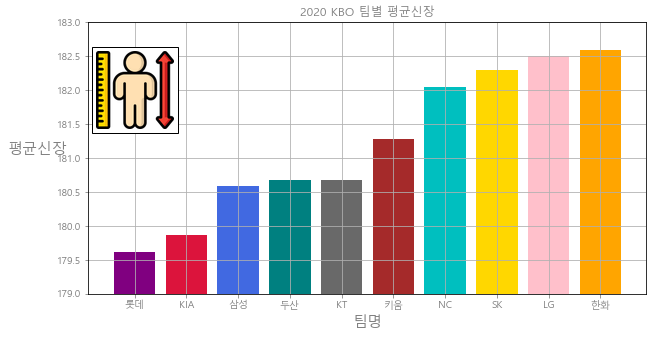

In [703]:

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Insert Image
fat_url = "https://image.flaticon.com/icons/png/128/2570/2570657.png"
img_taller = get_player_image_from_url(fat_url , add_resize_val=-50)
ax.add_artist( AnnotationBbox(OffsetImage(img_taller) ,(0, 182),frameon=True ))

sort_mean_kg = team_groups["신장"].mean().sort_values()

bar_colors = [colors[x] for x in sort_mean_kg.index]
plt.bar(sort_mean_kg.index, sort_mean_kg, color=bar_colors)
plt.title("2020 KBO 팀별 평균신장")
plt.ylim(179, 183)
plt.xlabel("팀명", fontsize=15)
ax.set_ylabel("평균신장", rotation=0, labelpad=20, fontsize=15)

plt.grid()
plt.show()

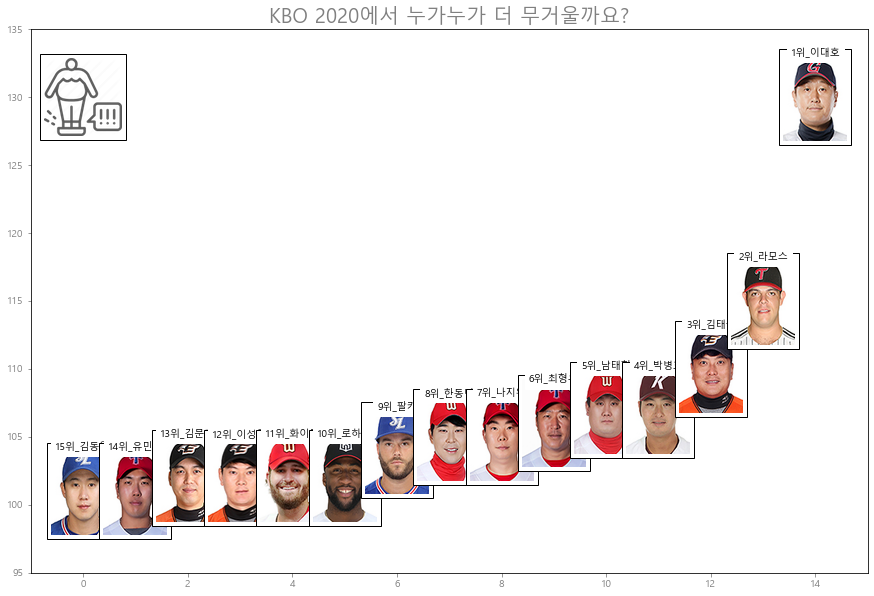

In [699]:
# Display weight Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "체중"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=True)

display_player_img_graph(sort_data, 95, 135, ax,
            top_num=15, add_text_pos_y=3, pick_column=pick_colum_name)

ax.add_artist( AnnotationBbox(OffsetImage(img_fat) ,(0, 130),frameon=True ))

plt.title("KBO 2020에서 누가누가 더 무거울까요?",fontsize=20)
plt.show()

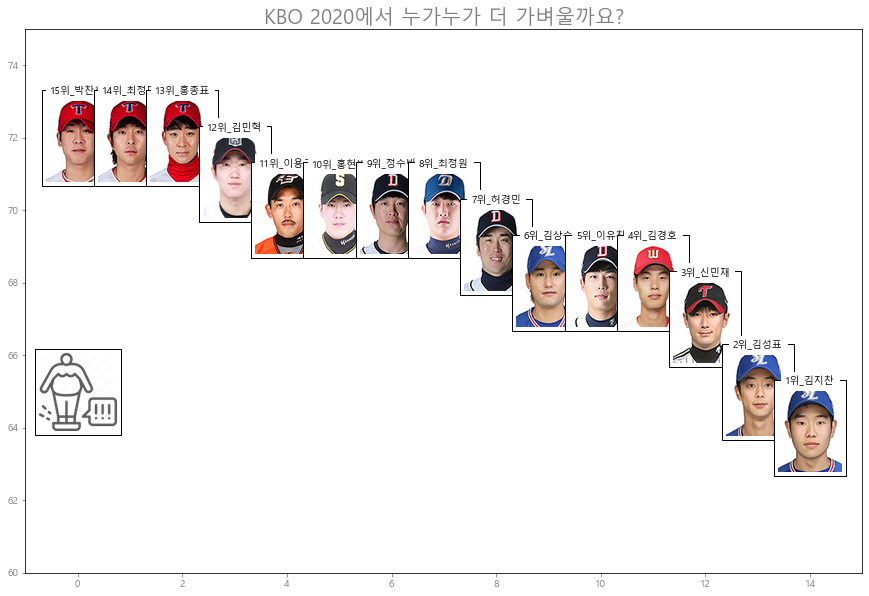

In [700]:
# Display low weight Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "체중"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=False)

display_player_img_graph(sort_data, 60, 75, ax,
            top_num=15, add_text_pos_y=1.2, pick_column=pick_colum_name)

ax.add_artist( AnnotationBbox(OffsetImage(img_fat) ,(0, 65),frameon=True ))

plt.title("KBO 2020에서 누가누가 더 가벼울까요?",fontsize=20)
plt.show()

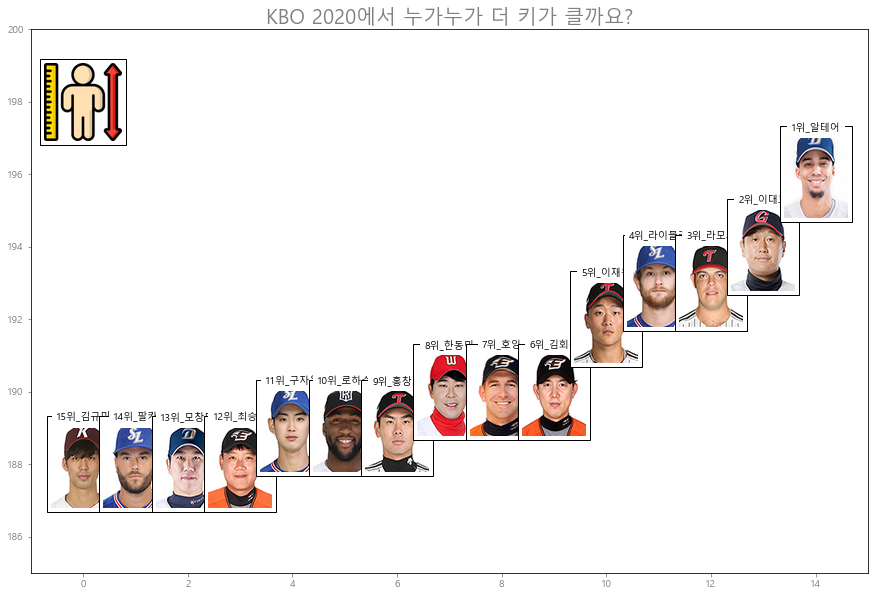

In [701]:
# Display height Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "신장"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=True)

display_player_img_graph(sort_data, 185, 200, ax,
            top_num=15, add_text_pos_y=1.2, pick_column=pick_colum_name)

ax.add_artist( AnnotationBbox(OffsetImage(img_taller) ,(0, 198),frameon=True ))

plt.title("KBO 2020에서 누가누가 더 키가 클까요?",fontsize=20)
plt.show()

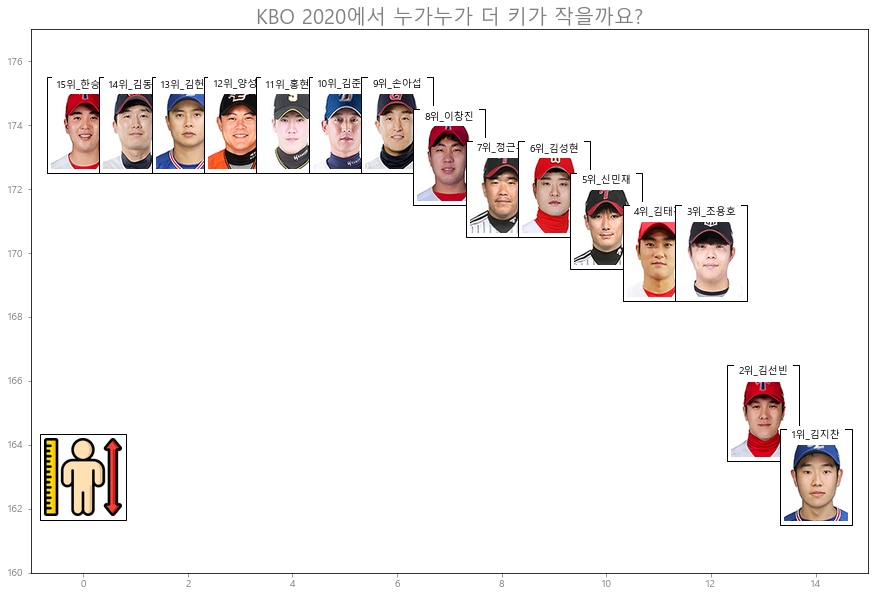

In [702]:
# Display low height Top
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

pick_colum_name = "신장"
sort_data = df_players[[pick_colum_name, "사진URL"]].\
            sort_values(by=pick_colum_name,ascending=False)

display_player_img_graph(sort_data, 160, 177, ax,
            top_num=15, add_text_pos_y=1.2, pick_column=pick_colum_name)

ax.add_artist( AnnotationBbox(OffsetImage(img_taller) ,(0, 163),frameon=True ))

plt.title("KBO 2020에서 누가누가 더 키가 작을까요?",fontsize=20)
plt.show()

###  BMI지수= 몸무게(kg) ÷ (신장(m) × 신장(m)) - 비만 계산법
- 산출된 값이 18.5 이하면 저체중,
- 18.5~23은 정상,
- 23~25는 과체중,
- 25~30은 비만,
- 30이상은 고도비만으로 나누어진다
###  야구 선수이다보니 비만율이 다들 높게 나옴. 저체중은 없었음.

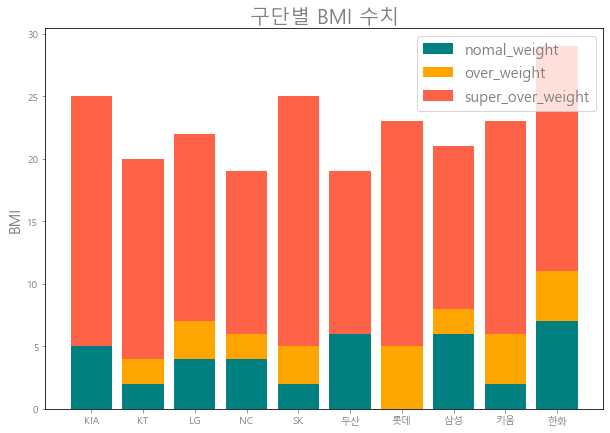

In [684]:
# Display BMI value
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)

# df_players.head()
fat_data = df_players[["신장","체중","팀명"]].reset_index()

def caculate_bmi(df):
    # BMI지수= 몸무게(kg) ÷ (신장(m) × 신장(m))
    cal_height = (df["신장"] * 0.01) ** 2
    return df["체중"] / cal_height
def judge_fat_level(series_bmi):
    if series_bmi < 18.5:
        return "low_w"
    elif series_bmi < 23:
        return "normal_w"
    elif series_bmi < 25:
        return "over_w"
    else:
        return "super_over_w"

fat_data["BMI"] = fat_data.apply(caculate_bmi, axis=1)
fat_data["BMI_LEVEL"] = fat_data["BMI"].apply(judge_fat_level)
bmi_data = fat_data[["팀명", "BMI_LEVEL"]]
team_bmi_count = bmi_data.groupby("팀명")["BMI_LEVEL"].value_counts()

index = team_bmi_count.index.get_level_values(0).unique()
index_bmi_key = team_bmi_count.index.get_level_values(1).unique()
df_bmi_level = pd.DataFrame(index=index, columns=index_bmi_key)
df_bmi_level.fillna(0,inplace=True)

for team_key in index:
    for bmi_key in index_bmi_key:
        try:
            df_bmi_level.loc[team_key, bmi_key] = team_bmi_count[team_key][bmi_key]
        except:
            pass
bar_with = 0.8

plt.bar(index, df_bmi_level["normal_w"], color='teal', width=bar_with, label="nomal_weight")

plt.bar(index, df_bmi_level["over_w"], bottom=df_bmi_level["normal_w"]
                    , color='orange', width=bar_with, label="over_weight")

plt.bar(index, df_bmi_level["super_over_w"], bottom=df_bmi_level["over_w"]
                    , color='tomato', width=bar_with, label="super_over_weight")
plt.title("구단별 BMI 수치", fontsize=20)
plt.legend(loc=1, prop={'size':15})
plt.ylabel("BMI", fontsize=15)
plt.show()

## 대체적으로 비만도가 높은 선수가 홈런도 많이 친다고 볼 수 있음.

c:\users\simon\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


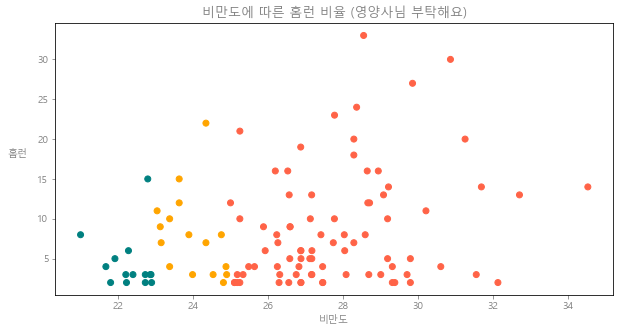

In [690]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# 원본에 비만도 추가
df_players["BMI"] = fat_data.set_index("선수명")["BMI"]
df_players["BMI_LEVEL"] = fat_data.set_index("선수명")["BMI_LEVEL"]

df_game_players = df_players[df_players["경기수"] > 10]
dic_bmi_colors = {"normal_w": "teal", "over_w":"orange", "super_over_w":"tomato"}
df_game_players["bmi_color"] = df_game_players["BMI_LEVEL"].apply(lambda x : dic_bmi_colors[x])
df_homrun = df_game_players[df_game_players["홈런"] > 1]

plt.scatter(df_homrun["BMI"],df_homrun["홈런"] , c=df_homrun["bmi_color"])
plt.xlabel("비만도")
ax.set_ylabel("홈런", rotation=0, labelpad=20)
plt.title("비만도에 따른 홈런 비율 (영양사님 부탁해요)", fontsize=13)

plt.show()

## - 꼭 비만도가 높다고 장타율이 높은건 아니였음.

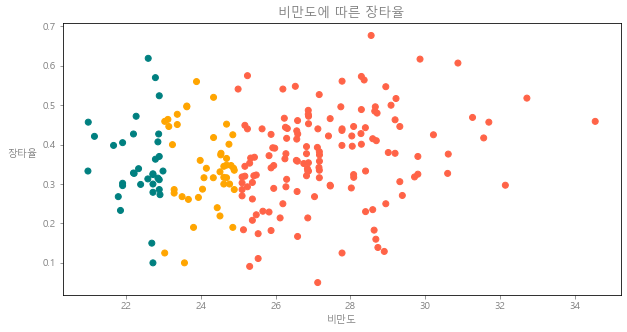

In [686]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(df_game_players["BMI"],df_game_players["장타율"] , c=df_game_players["bmi_color"])
plt.xlabel("비만도")
plt.title("비만도에 따른 장타율",  fontsize=13)
ax.set_ylabel("장타율", rotation=0, labelpad=20)
plt.show()


## - 상식적으로 비만도가 높으면 병살도 높을 꺼라 생각하지만 생각보다 그렇게 높지도 않았음.

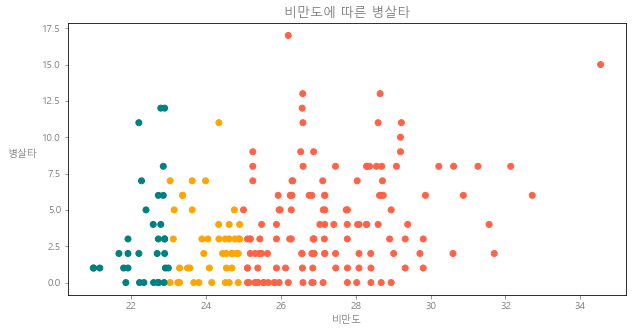

In [687]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

df_bungsal = df_game_players[df_game_players["병살타"] > 0]
plt.scatter(df_game_players["BMI"],df_game_players["병살타"] , c=df_game_players["bmi_color"])
plt.xlabel("비만도")
plt.title("비만도에 따른 병살타",  fontsize=13)
ax.set_ylabel("병살타", rotation=0, labelpad=20)
plt.show()

TODO

### 팀별 신장
### 먼저 가장 몸무게가 나가는사람 적게나가는사람 표시
### 키가 가장큰사람 적은사람

### 비만도 측정

### 레전드에 이미지 넣기 있으면 키인지 무게인지 넣어주기.

### 몸무게 혹은 키 혹은 비만도에 따라서 장타율은 얼마나 나오는지 표시

# 도루율 표시
# 팀별 홈런 어떻게되는지 또 도루는 어디가 많은지